# Lecture 25: Numerical solution of a fast-slow system with three equations

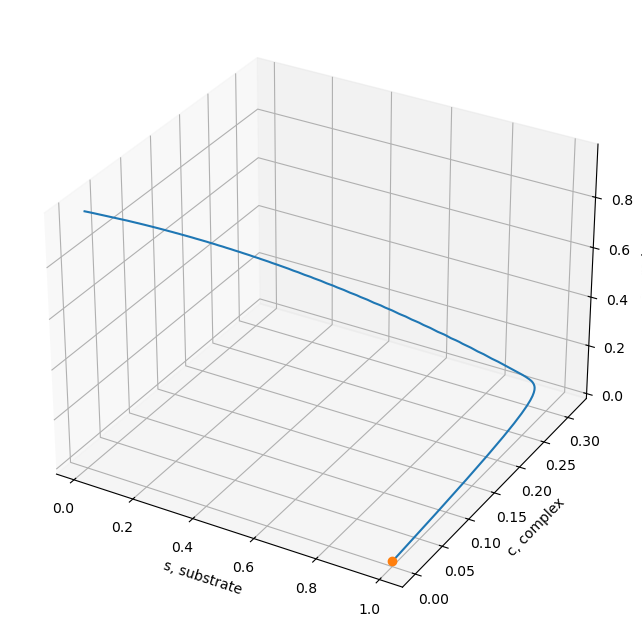

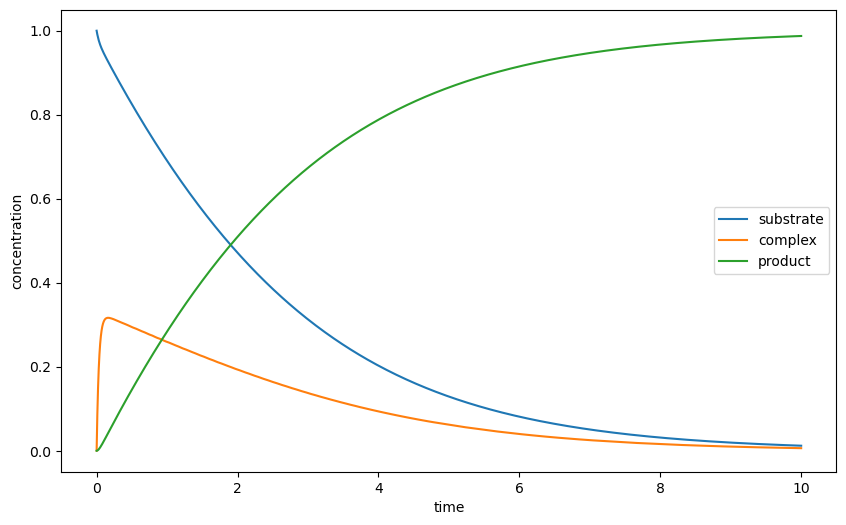

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

ep = 0.1;
lam = 1
mu = 2

# Slow manifold, s = S(c)
S = lambda c: mu*c/(1 - c)
def f(t,Y):
    s, c, p = Y
    sp = -s*(1 - c) + lam*c
    cp = 1/ep*(s*(1 - c) - mu*c)
    pp = (mu - lam)*c
    return [sp, cp, pp]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# # Plot an example solution
s0 = 1; c0 = 0; p0 = 0;
tstart = 0; tend = 10;
t = np.linspace(tstart, tend, 1000)
sol = solve_ivp(f, [tstart, tend], [s0,c0,p0], t_eval=t)

ax.plot(sol.y[0,:],sol.y[1,:], sol.y[2,:])
ax.plot(s0, c0, p0, 'o')
ax.set_xlabel('s, substrate')
ax.set_ylabel('c, complex')
ax.set_zlabel('p, product')


# ax2.plot(sol.t, sol.y[0,:])
# ax2.plot(sol.t, sol.y[1,:])
# ax2.set(xlabel='t', ylabel='x, y');

fig2, ax2 = plt.subplots(1,1, figsize=(10, 6))
# ax2 = fig.add_subplot(1,1);
ax2.plot(sol.t, sol.y[0,:], label='substrate')
ax2.plot(sol.t, sol.y[1,:], label='complex')
ax2.plot(sol.t, sol.y[2,:], label='product')
ax2.legend()
ax2.set_xlabel('time'); ax2.set_ylabel('concentration'); 

The leading-order outer solution is 
$$
s = \frac{\mu c_0}{1 - c_0}
$$
which is suggestive that we should examine the phase plane for (s, c). 

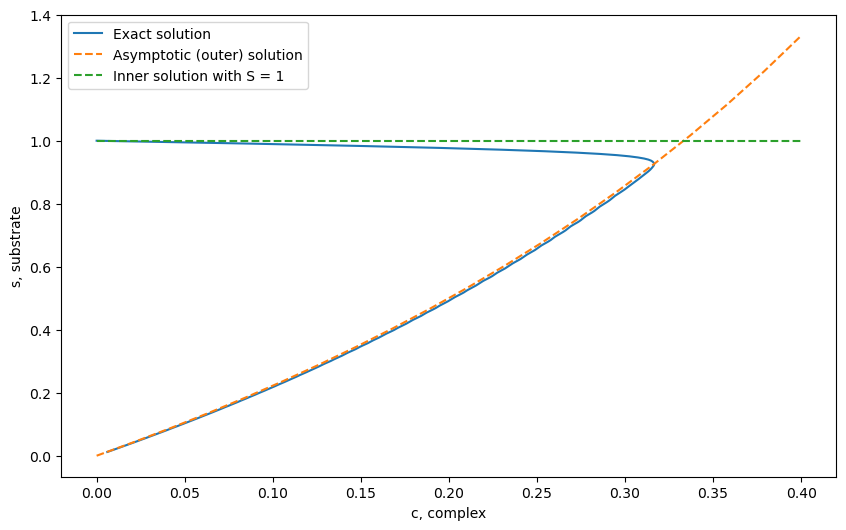

In [10]:
# Generate the above curve by creating a set of values for c0
c00 = np.linspace(0, 0.4, 20);
s00 = mu*c00/(1 - c00);

fig3, ax3 = plt.subplots(1,1, figsize=(10, 6))
ax3.plot(sol.y[1,:], sol.y[0,:], label='Exact solution');
ax3.plot(c00, s00, '--', label='Asymptotic (outer) solution');
ax3.plot(c00, 0*c00 + 1, '--', label='Inner solution with S = 1');
ax3.legend()
ax3.set_xlabel('c, complex'); ax3.set_ylabel('s, substrate'); 

## The Michaelis-Menten law

Finally we can plot and solve a single equation for the substrate and product. This is a very nice simplification that indicates that, although the enzyme is doing complicated things to produce the reaction, in fact we need only solve an 'effective' equation for the lone substrate concentration: 
$$
s_0'(t) = -\frac{\mu -\lambda}{\mu + s_0} s_0, \qquad s_0(0) = 1, 
$$
and $p_0 = 1 - s_0$. 

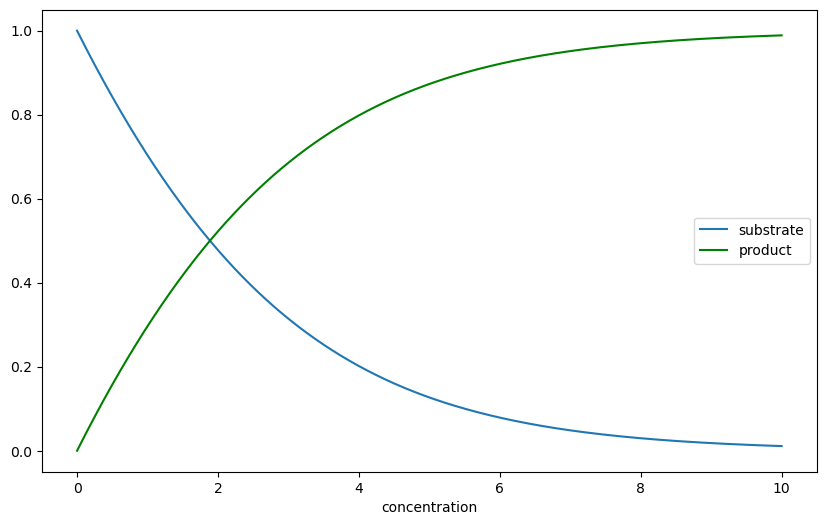

In [6]:
ds = lambda t, s0: -(mu - lam)/(mu + s0)*s0
sol = solve_ivp(ds, [tstart, tend], [1], t_eval=t)
# Now extract the values
s0solve = sol.y[0,:]
p0solve = 1 - s0solve

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(t,s0solve, label='substrate')
ax.plot(t,p0solve, 'g', label='product')
ax.legend()
ax.set_xlabel('time, t'); ax.set_xlabel('concentration');